In [387]:
import requests # for making standard html requests
from bs4 import BeautifulSoup # magical tool for parsing html data
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
from sklearn.metrics import mean_absolute_percentage_error # for model evaluation
import statsmodels.api as sm # for data exploration
import scipy.stats as stats # for statistical analysis
from sklearn.linear_model import SGDClassifier # for classification
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split # for cross validation and hyperparameter tuning
from statsmodels.formula.api import glm # for classification
from sklearn.preprocessing import OrdinalEncoder, StandardScaler # for data preprocessing
from sklearn.pipeline import Pipeline # for data preprocessing
from sklearn.metrics import classification_report, accuracy_score # for model evaluation
from sklearn.tree import DecisionTreeClassifier # for classification
from xgboost import XGBClassifier # for classification


##### Importing data and aggregating to create a fine tuned dataset for the project.

Collating information specific to flights that may cause delays for the final dataset. 

In [388]:
# Saving the file path to use it for easier importing of datasets.
address = 'C:\\Users\conta\Desktop\JobReadiness Projects\Capstone_3'

In [389]:
airlines = pd.read_excel(address + '\Airlines.xlsx')
airports = pd.read_excel(address + '\\airports.xlsx')
runways = pd.read_excel(address + '\\runways.xlsx')

Lets look at the imported data.

In [390]:
airlines.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [391]:
airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [392]:
runways.head()

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0,H1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0,N,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
2,254165,6525,00AL,2300.0,200.0,TURF,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
3,270932,6526,00AR,40.0,40.0,GRASS,0,0,H1,NaN,NaN,NaN,NaN,NaN,H1,NaN,NaN,NaN,NaN,NaN
4,322128,322127,00AS,1450.0,60.0,Turf,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN


Let's **merge** airports and runways and create airport_run using the **ident column in airports**, and the **airport_ident column in runways**. We are doing a left join i.e. all of airports columns and only the matching values from runways will be imported.

In [393]:
airport_run = pd.merge(airports, runways, left_on='ident', right_on='airport_ident', how='left')
airport_run.head()

,id_x,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,...,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,...,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,...,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,...,NaN,NaN,NaN,NaN,H1,NaN,NaN,NaN,NaN,NaN


In [394]:
airport_run.columns

Index(['id_x', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'gps_code', 'iata_code',
       'local_code', 'home_link', 'wikipedia_link', 'keywords', 'id_y',
       'airport_ref', 'airport_ident', 'length_ft', 'width_ft', 'surface',
       'lighted', 'closed', 'le_ident', 'le_latitude_deg', 'le_longitude_deg',
       'le_elevation_ft', 'le_heading_degT', 'le_displaced_threshold_ft',
       'he_ident', 'he_latitude_deg', 'he_longitude_deg', 'he_elevation_ft',
       'he_heading_degT', 'he_displaced_threshold_ft'],
      dtype='object')

Lets count the number of runways each airport has. Here we will **group the rows** based on the **common airport_ident** values while keep a **count of the non-null values in id_y** which has the runway entries of a particular airport.

In [395]:
count_runway = airport_run.groupby('airport_ident')[['id_y']].count().sort_values(by='id_y', ascending = False).reset_index()
count_runway.head()

,airport_ident,id_y
0,KORD,11
1,KNHU,10
2,JRA,9
3,TA12,8
4,SXS,8


Now that we have a count of runways for each airport, let's create a **new dataset containing airport iata code, type of airport, elevation of airport, and the number of runways**. All of which could play a role in delays.

In [396]:
air_run = pd.merge(airports, count_runway, left_on = 'ident', right_on = 'airport_ident', how = 'left')
air_run.rename(columns = {'id_y':'runway_count'}, inplace = True)
air_run.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,airport_ident,runway_count
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN,00A,1.0
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN,00AK,1.0
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN,00AL,1.0
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR,00AR,1.0


In [397]:
air_run = air_run[['iata_code','type','elevation_ft','runway_count']]

In [398]:
air_run.head()

,iata_code,type,elevation_ft,runway_count
0,NaN,heliport,11.0,1.0
1,NaN,small_airport,3435.0,NaN
2,NaN,small_airport,450.0,1.0
3,NaN,small_airport,820.0,1.0
4,NaN,closed,237.0,1.0


In [399]:
air_run.shape

(73805, 4)

In [400]:
air_run.isnull().sum()

iata_code       64645
type                0
elevation_ft    14122
runway_count    36540
dtype: int64

In [401]:
# Removing null values and saving the rest as an excel file. 
air_run.dropna().to_excel('air_run.xlsx', index = False)

In [402]:
airlines.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


Lets **add info about the AirportFrom** values by combining the airlines and air_run datasets based on the AirportFrom and iata_code columns, this would give us the **count of runways, elevation, and iata_code of the airports from where flights take off**. Something that could be a factor in delays. 

In [403]:
combined_data = pd.merge(airlines, air_run, how='left', left_on='AirportFrom', right_on = 'iata_code')

new_names = list(combined_data[air_run.columns].columns + '_source_airport')
old_names = list(combined_data[air_run.columns].columns)

combined_data.rename(columns = {old:new for old, new in zip(old_names, new_names)}, inplace = True)
combined_data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,iata_code_source_airport,type_source_airport,elevation_ft_source_airport,runway_count_source_airport
0,1,CO,269,SFO,IAH,3,15,205,1,SFO,large_airport,13.0,4.0
1,2,US,1558,PHX,CLT,3,15,222,1,PHX,large_airport,1135.0,3.0
2,3,AA,2400,LAX,DFW,3,20,165,1,LAX,large_airport,125.0,4.0
3,4,AA,2466,SFO,DFW,3,20,195,1,SFO,large_airport,13.0,4.0
4,5,AS,108,ANC,SEA,3,30,202,0,ANC,large_airport,152.0,3.0


In [404]:
combined_data.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay', 'iata_code_source_airport',
       'type_source_airport', 'elevation_ft_source_airport',
       'runway_count_source_airport'],
      dtype='object')

Let's **add similar info about the destination airports**. This would also be a factor in flights delays. For eg: if the destination airport has only one runway, flights would have to park themselves and wait for their turn to land resulting in delays. 

But this time we will use combined_data instead of airlines since we have all the info from airlines dataset from previous steps. 


In [405]:
combined_data = pd.merge(combined_data, air_run, how='left', left_on = 'AirportTo', right_on='iata_code')


In [406]:
new_names = list(combined_data[air_run.columns].columns + '_dest_airport')
old_names = list(combined_data[air_run.columns].columns)

combined_data.rename(columns = {old:new for old,new in zip(old_names, new_names)}, inplace = True)
combined_data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,iata_code_source_airport,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,iata_code_dest_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport
0,1,CO,269,SFO,IAH,3,15,205,1,SFO,large_airport,13.0,4.0,IAH,large_airport,97.0,5.0
1,2,US,1558,PHX,CLT,3,15,222,1,PHX,large_airport,1135.0,3.0,CLT,large_airport,748.0,4.0
2,3,AA,2400,LAX,DFW,3,20,165,1,LAX,large_airport,125.0,4.0,DFW,large_airport,607.0,7.0
3,4,AA,2466,SFO,DFW,3,20,195,1,SFO,large_airport,13.0,4.0,DFW,large_airport,607.0,7.0
4,5,AS,108,ANC,SEA,3,30,202,0,ANC,large_airport,152.0,3.0,SEA,large_airport,433.0,4.0


In [407]:
# We don't need iata_code columns now, lets drop them. 
combined_data.drop(columns = list(combined_data.columns[combined_data.columns.str.startswith('iata_code')]), inplace = True)

In [408]:
combined_data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0
2,3,AA,2400,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0
3,4,AA,2466,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0
4,5,AS,108,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0


As is with every profession, the amount of experience we have plays an important role in our performance. Applying that logic to airline delays, let's **extract experience info about each airline in our dataset** from "https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States" using Beautiful Soup class from bs4 and requests lib.

In [409]:
# Extracting the number of tables in the URL.

airexp_url = requests.get('https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States').text
soup = BeautifulSoup(airexp_url, 'lxml')
tables_found = soup.findAll("table", {"class":"wikitable"})

In [410]:
len(tables_found)

7

In [411]:
airlines_wiki_list = []
for tab in tables_found:
    temp = pd.read_html(str(tab))
    temp = pd.DataFrame(temp[0])
    airlines_wiki_list.append(temp)

In [412]:
airlines_wiki = pd.concat(airlines_wiki_list)

Now that we have extracted all the relevant information from the wiki URL, its time to add that into our master dataset i.e. combined_data.

In [413]:
# Let's start by idetifying the founding year of the airlines in combined_data.

airlines_founded = pd.merge(combined_data[['Airline']].drop_duplicates(), airlines_wiki[['IATA', 'Founded']].drop_duplicates(), how='left', left_on= 'Airline', right_on='IATA')

In [414]:
airlines_founded

,Airline,IATA,Founded
0,CO,NaN,NaN
1,US,NaN,NaN
2,AA,AA,1926.0
3,AS,AS,1932.0
4,DL,DL,1924.0
5,B6,B6,1998.0
6,HA,HA,1929.0
7,OO,OO,1972.0
8,9E,9E,1985.0
9,OH,OH,1979.0


Apart from the experience, the traffic of the airport is also a factor in delays. If your source/destination airport sees a lot of traffic, naturally the take-off and landing times will be affected. 

For this step, **we will extract info from** https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States

But this wikipedia page was updated recently, so I am **using a previous version of the wikipedia page of 13 April 2023** from this URL: https://en.wikipedia.org/w/index.php?title=List_of_the_busiest_airports_in_the_United_States&oldid=1149689977

In [415]:
traffic_url = requests.get('https://en.wikipedia.org/w/index.php?title=List_of_the_busiest_airports_in_the_United_States&oldid=1149689977').text
soup = BeautifulSoup(traffic_url,'lxml')
traffic_tables = soup.findAll("table", {"class":"wikitable"})

In [416]:
hub_data = {}
i=0
for tab in traffic_tables:
    hub_data[i] = pd.read_html(str(tab))
    hub_data[i] = pd.DataFrame(hub_data[i][0])
    i+=1

In [417]:
large_hub = hub_data[0].copy()
med_hub = hub_data[1].copy()

large_hub.insert(loc =1, column = 'Hub_type', value = 'large')
med_hub.insert(loc =1, column = 'Hub_type', value = 'medium')  

In [418]:
large_hub.head()

,Rank (2021),Hub_type,Airports (large hubs),IATA Code,Major cities served,State,2021[3],2020[4],2019[5],2018[6],2017[7],2016[8],2015[9],2014[10],2013[11],2012[12]
0,1,large,Hartsfield–Jackson Atlanta International Airport,ATL,Atlanta,GA,36676010,20559866,53505795,51865797,50251964,50501858,49340732,46604273,45308407,45798928
1,2,large,Dallas/Fort Worth International Airport,DFW,Dallas & Fort Worth,TX,30005266,18593421,35778573,32821799,31816933,31283579,31589839,30804567,29038128,28022904
2,3,large,Denver International Airport,DEN,Denver,CO,28645527,16243216,33592945,31362941,29809097,28267394,26280043,26000591,25496885,25799841
3,4,large,O'Hare International Airport,ORD,Chicago,IL,26350976,14606034,40871223,39873927,38593028,37589899,36305668,33843426,32317835,32171795
4,5,large,Los Angeles International Airport,LAX,Los Angeles,CA,23663410,14055777,42939104,42624050,41232432,39636042,36351272,34314197,32425892,31326268


In [419]:
med_hub.head()

,Rank (2021),Hub_type,Airports (medium hubs),IATA Code,City served,State,2021[3],2020[4],2019[5],2018[6],2017[7],2016[8],2015[9],2014[10],2013[11],2012[12]
0,31,medium,Dallas Love Field,DAL,Dallas,TX,6487563,3669930,8408457,8134848,7876769,7554596,7040921,4522341,4023779,3902628
1,32,medium,Daniel K. Inouye International Airport,HNL,Honolulu,HI,5830928,3126391,9988678,9578505,9743989,9656340,9656340,9463000,9466995,9225848
2,33,medium,Portland International Airport,PDX,Portland,OR,5759879,3455877,9797408,9940866,9435473,9071154,8340234,7878760,7452603,7142620
3,34,medium,William P. Hobby Airport,HOU,Houston,TX,5560780,3127178,7069614,6937061,6741870,6285181,5937944,5800726,5377050,5043737
4,35,medium,Southwest Florida International Airport,RSW,Fort Myers,FL,5080805,2947139,5144467,4719568,4461304,4350650,4231134,4025959,3788870,3634152


In [420]:
# Let's clean the column names from special characters or things in bracket.

column_temp = large_hub.columns.str.split('[([]').str[0].str.strip().str.lower().str.replace(' ','_').values
column_temp[list(map( lambda x:x.isnumeric(), column_temp))] = 'data_' + column_temp[list(map( lambda x:x.isnumeric(), column_temp))]
large_hub.columns = column_temp
large_hub.columns

Index(['rank', 'hub_type', 'airports', 'iata_code', 'major_cities_served',
       'state', 'data_2021', 'data_2020', 'data_2019', 'data_2018',
       'data_2017', 'data_2016', 'data_2015', 'data_2014', 'data_2013',
       'data_2012'],
      dtype='object')

In [421]:
column_temp = med_hub.columns.str.split('[([]').str[0].str.strip().str.lower().str.replace(' ','_').values
column_temp[list(map( lambda x : x.isnumeric(), column_temp))]  = 'data_' + column_temp[list(map( lambda x : x.isnumeric(), column_temp))] 
med_hub.columns = column_temp
med_hub.columns

Index(['rank', 'hub_type', 'airports', 'iata_code', 'city_served', 'state',
       'data_2021', 'data_2020', 'data_2019', 'data_2018', 'data_2017',
       'data_2016', 'data_2015', 'data_2014', 'data_2013', 'data_2012'],
      dtype='object')

In [422]:
# Renaming 'major cities served' to 'city served'.

large_hub.rename(columns = {'major_cities_served' : 'ciity_served'}, inplace = True)

In [423]:
# Collating the info about large and medium hubs into one dataframe.

final_hub_data = pd.concat([large_hub, med_hub])
final_hub_data.head()

,rank,hub_type,airports,iata_code,ciity_served,state,data_2021,data_2020,data_2019,data_2018,data_2017,data_2016,data_2015,data_2014,data_2013,data_2012,city_served
0,1,large,Hartsfield–Jackson Atlanta International Airport,ATL,Atlanta,GA,36676010,20559866,53505795,51865797,50251964,50501858,49340732,46604273,45308407,45798928,NaN
1,2,large,Dallas/Fort Worth International Airport,DFW,Dallas & Fort Worth,TX,30005266,18593421,35778573,32821799,31816933,31283579,31589839,30804567,29038128,28022904,NaN
2,3,large,Denver International Airport,DEN,Denver,CO,28645527,16243216,33592945,31362941,29809097,28267394,26280043,26000591,25496885,25799841,NaN
3,4,large,O'Hare International Airport,ORD,Chicago,IL,26350976,14606034,40871223,39873927,38593028,37589899,36305668,33843426,32317835,32171795,NaN
4,5,large,Los Angeles International Airport,LAX,Los Angeles,CA,23663410,14055777,42939104,42624050,41232432,39636042,36351272,34314197,32425892,31326268,NaN


In [424]:
final_hub_data.data_2021.isnull().sum()

0

In [425]:
# Let's add traffic info in our master dataset i.e. combined_data and create a new dataset combined_data_traffic.

combined_data_traffic = pd.merge(combined_data, final_hub_data[['iata_code','data_2021']], how='left', left_on='AirportFrom', right_on='iata_code')


In [426]:
# Renaming the iata_code and data_2021 columns to reflect the source airport.
combined_data_traffic.rename(columns = {'iata_code':'iata_code_source', 'data_2021':'data_2021_source_airport'}, inplace=True)

In [427]:
combined_data_traffic.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,iata_code_source,data_2021_source_airport
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,SFO,11725347.0
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,PHX,18940287.0
2,3,AA,2400,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0,LAX,23663410.0
3,4,AA,2466,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0,SFO,11725347.0
4,5,AS,108,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0,ANC,2184959.0


In [428]:
# Merging traffic info for destination airports. 

combined_data_traffic = pd.merge(combined_data_traffic, final_hub_data[['iata_code', 'data_2021']], how = 'left', left_on='AirportTo', right_on='iata_code')

In [429]:
# Renaming the added columns to reflect the destination airport. 

combined_data_traffic.rename(columns = {'iata_code' : 'iata_code_dest','data_2021':'data_2021_dest_airport'}, inplace = True)

In [430]:
combined_data_traffic

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,iata_code_source,data_2021_source_airport,iata_code_dest,data_2021_dest_airport
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,SFO,11725347.0,IAH,16242821.0
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,PHX,18940287.0,CLT,20900875.0
2,3,AA,2400,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0,LAX,23663410.0,DFW,30005266.0
3,4,AA,2466,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0,SFO,11725347.0,DFW,30005266.0
4,5,AS,108,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0,ANC,2184959.0,SEA,17430195.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518551,539377,B6,717,JFK,SJU,5,1439,220,1,large_airport,13.0,4.0,large_airport,9.0,2.0,JFK,15273342.0,SJU,4738725.0
518552,539378,B6,739,JFK,PSE,5,1439,223,1,large_airport,13.0,4.0,medium_airport,29.0,1.0,JFK,15273342.0,NaN,NaN
518553,539379,CO,178,OGG,SNA,5,1439,326,0,medium_airport,54.0,2.0,large_airport,56.0,2.0,OGG,2933315.0,SNA,3807205.0
518554,539382,UA,78,HNL,SFO,5,1439,313,1,large_airport,13.0,6.0,large_airport,13.0,4.0,HNL,5830928.0,SFO,11725347.0


Adding the founding year of respective airlines.


In [431]:
airlines_founded

,Airline,IATA,Founded
0,CO,NaN,NaN
1,US,NaN,NaN
2,AA,AA,1926.0
3,AS,AS,1932.0
4,DL,DL,1924.0
5,B6,B6,1998.0
6,HA,HA,1929.0
7,OO,OO,1972.0
8,9E,9E,1985.0
9,OH,OH,1979.0


In [432]:
# Merging it with combined_data_traffic using 'Airline' column. 

combined_data_traffic = pd.merge(combined_data_traffic, airlines_founded[['Airline', 'Founded']], how='left', left_on='Airline', right_on='Airline')

In [433]:
combined_data_traffic.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,iata_code_source,data_2021_source_airport,iata_code_dest,data_2021_dest_airport,Founded
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,SFO,11725347.0,IAH,16242821.0,NaN
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,PHX,18940287.0,CLT,20900875.0,NaN
2,3,AA,2400,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0,LAX,23663410.0,DFW,30005266.0,1926.0
3,4,AA,2466,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0,SFO,11725347.0,DFW,30005266.0,1926.0
4,5,AS,108,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0,ANC,2184959.0,SEA,17430195.0,1932.0


Missing value treatment for the final dataset.

In [434]:
combined_data_traffic.isnull().sum()

id                                 0
Airline                            0
Flight                             0
AirportFrom                        0
AirportTo                          0
DayOfWeek                          0
Time                               0
Length                             0
Delay                              0
type_source_airport               31
elevation_ft_source_airport       31
runway_count_source_airport       31
type_dest_airport                 31
elevation_ft_dest_airport         31
runway_count_dest_airport         31
iata_code_source               83582
data_2021_source_airport       83582
iata_code_dest                 83531
data_2021_dest_airport         83531
Founded                        83601
dtype: int64

In [435]:
# Let's start with type of airport.

# For source airport.
combined_data_traffic[combined_data_traffic.type_source_airport.isnull()].AirportFrom.unique()

array(['CYS'], dtype=object)

In [436]:
# For destination airport.
combined_data_traffic[combined_data_traffic.type_dest_airport.isnull()].AirportTo.unique()

array(['CYS'], dtype=object)

In [437]:
# Lets see what the data dictionary has to say about CYS.

airport_dic = pd.read_excel(address + '\Data Dictionary.xlsx', sheet_name = 'airlines')
airport_dic.head()

,Column,Description,Unnamed: 2
0,Airline,Different types of commercial airlines,NaN
1,Flight,Types of Aircraft,NaN
2,AirportFrom,Source Airport,NaN
3,AirportTo,Destination Airport,NaN
4,DayOfWeek,Tells you about the day of week,NaN


In [438]:
# Checking for the Description column for 'CYS'

row = airport_dic[airport_dic['Column'] == 'CYS'].Description.values.astype(str)
print(row)


['Cheyenne Regional Jerry Olson Field']


In [439]:
airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [440]:
# Extracting the type of airport and elevantion ft for 'CYS' from airports dataset.

nan_airport = airports.loc[airports.name.str.lower() == row[0].lower(), ['ident', 'name', 'iata_code', 'type', 'elevation_ft']]
nan_airport


,ident,name,iata_code,type,elevation_ft
34675,KCYS,Cheyenne Regional Jerry Olson Field,NaN,medium_airport,6159.0


In [441]:
# Getting the runway count for 'CYS' from runway dataset.

miss_comb = pd.merge(nan_airport, runways[['airport_ident', 'id']], how = 'left', left_on = 'ident', right_on = 'airport_ident')

miss_runway_count = miss_comb.groupby('ident')[['id']].count().reset_index()
miss_runway_count



,ident,id
0,KCYS,2


In [442]:
air_miss_data = pd.merge(nan_airport, miss_runway_count).rename(columns = {'id': 'runway_count'})[['iata_code', 'type', 'elevation_ft', 'runway_count']]
air_miss_data

,iata_code,type,elevation_ft,runway_count
0,NaN,medium_airport,6159.0,2


In [443]:
combined_data_traffic.loc[combined_data_traffic.AirportFrom == 'CYS', ['type_source_airport']] = air_miss_data[['type']].values
combined_data_traffic.loc[combined_data_traffic.AirportFrom == 'CYS', ['elevation_ft_source_airport']] = air_miss_data[['elevation_ft']].values
combined_data_traffic.loc[combined_data_traffic.AirportFrom == 'CYS', ['runway_count_source_airport']] = air_miss_data[['runway_count']].values


In [444]:
combined_data_traffic.loc[combined_data_traffic.AirportTo == 'CYS', ['type_dest_airport']] = air_miss_data[['type']].values
combined_data_traffic.loc[combined_data_traffic.AirportTo == 'CYS', ['elevation_ft_dest_airport']] = air_miss_data[['elevation_ft']].values
combined_data_traffic.loc[combined_data_traffic.AirportTo == 'CYS', ['runway_count_dest_airport']] = air_miss_data[['runway_count']].values


In [445]:
combined_data_traffic.isnull().sum()

id                                 0
Airline                            0
Flight                             0
AirportFrom                        0
AirportTo                          0
DayOfWeek                          0
Time                               0
Length                             0
Delay                              0
type_source_airport                0
elevation_ft_source_airport        0
runway_count_source_airport        0
type_dest_airport                  0
elevation_ft_dest_airport          0
runway_count_dest_airport          0
iata_code_source               83582
data_2021_source_airport       83582
iata_code_dest                 83531
data_2021_dest_airport         83531
Founded                        83601
dtype: int64

Let's work on the founded column.

In [446]:
airline_dict = pd.read_excel(address + '\Data Dictionary.xlsx', sheet_name = 'airlines',header = 10, usecols = [0,1])
airline_dict.head(2)

,Airlines ID,Description
0,WN,Southwest
1,DL,Delta


In [447]:
miss_founded = combined_data_traffic[combined_data_traffic.Founded.isnull()].Airline.unique()
miss_founded

array(['CO', 'US', 'EV'], dtype=object)

In [448]:
# Let's look for the description of these in our data dictionary.

miss_airline = airline_dict[airline_dict['Airlines ID'].isin(miss_founded)]
miss_airline

,Airlines ID,Description
5,US,PSA (initially US Airway Express)
7,EV,ExpressJet
9,CO,United Airlines (initially CO)


Since the founding years of these airlines was not in the Wiki URL we will look for the founding years of these airlines on Google and use the values here.

![AirlineInfo](address+'\airlines_founded.png')

US - 1967
EV - 1986
CO - 1931

In [449]:
miss_val = {'US':1967, 'EV':1986, 'CO':1931}

for aline in miss_founded:
    combined_data_traffic.loc[(combined_data_traffic.Founded.isnull())& (combined_data_traffic.Airline ==aline),'Founded'] = miss_val[aline]

In [450]:
combined_data_traffic.isnull().sum()

id                                 0
Airline                            0
Flight                             0
AirportFrom                        0
AirportTo                          0
DayOfWeek                          0
Time                               0
Length                             0
Delay                              0
type_source_airport                0
elevation_ft_source_airport        0
runway_count_source_airport        0
type_dest_airport                  0
elevation_ft_dest_airport          0
runway_count_dest_airport          0
iata_code_source               83582
data_2021_source_airport       83582
iata_code_dest                 83531
data_2021_dest_airport         83531
Founded                            0
dtype: int64

In [451]:
combined_data_traffic.drop(columns = ['iata_code_source', 'iata_code_dest'], inplace = True)

In [452]:
(combined_data_traffic.isna().sum().sort_values(ascending = False)/combined_data_traffic.shape[0])*100

data_2021_source_airport       16.118221
data_2021_dest_airport         16.108386
id                              0.000000
Airline                         0.000000
runway_count_dest_airport       0.000000
elevation_ft_dest_airport       0.000000
type_dest_airport               0.000000
runway_count_source_airport     0.000000
elevation_ft_source_airport     0.000000
type_source_airport             0.000000
Delay                           0.000000
Length                          0.000000
Time                            0.000000
DayOfWeek                       0.000000
AirportTo                       0.000000
AirportFrom                     0.000000
Flight                          0.000000
Founded                         0.000000
dtype: float64

We will use the median airport traffic for 16% missing value treatment. 

In [453]:
med_val = combined_data_traffic.groupby('type_source_airport')[['data_2021_source_airport']].median()
med_val

,data_2021_source_airport
type_source_airport,
large_airport,14514049.0
medium_airport,2273259.0
small_airport,NaN


In [454]:
for typ in combined_data_traffic.type_source_airport.unique():
      combined_data_traffic.loc[(combined_data_traffic.type_source_airport == typ)& (combined_data_traffic.data_2021_source_airport.isna()),
                      'data_2021_source_airport'] = med_val.loc[typ].values[0]

In [455]:
med_val_dest = combined_data_traffic.groupby('type_dest_airport')[['data_2021_dest_airport']].median()
med_val_dest

,data_2021_dest_airport
type_dest_airport,
large_airport,14514049.0
medium_airport,2273259.0
small_airport,NaN


In [456]:
for typ in combined_data_traffic.type_source_airport.unique():
      combined_data_traffic.loc[(combined_data_traffic.type_dest_airport == typ)& (combined_data_traffic.data_2021_dest_airport.isna()),
                      'data_2021_dest_airport'] = med_val.loc[typ].values[0]

In [457]:
(combined_data_traffic.isna().sum().sort_values(ascending = False)/combined_data_traffic.shape[0])*100

data_2021_source_airport       0.226205
data_2021_dest_airport         0.224855
id                             0.000000
Airline                        0.000000
runway_count_dest_airport      0.000000
elevation_ft_dest_airport      0.000000
type_dest_airport              0.000000
runway_count_source_airport    0.000000
elevation_ft_source_airport    0.000000
type_source_airport            0.000000
Delay                          0.000000
Length                         0.000000
Time                           0.000000
DayOfWeek                      0.000000
AirportTo                      0.000000
AirportFrom                    0.000000
Flight                         0.000000
Founded                        0.000000
dtype: float64

In [458]:
combined_data_traffic.dropna(subset=['data_2021_source_airport', 'data_2021_dest_airport'], inplace=True)


In [459]:
(combined_data_traffic.isna().sum().sort_values(ascending = False)/combined_data_traffic.shape[0])*100

id                             0.0
Airline                        0.0
data_2021_dest_airport         0.0
data_2021_source_airport       0.0
runway_count_dest_airport      0.0
elevation_ft_dest_airport      0.0
type_dest_airport              0.0
runway_count_source_airport    0.0
elevation_ft_source_airport    0.0
type_source_airport            0.0
Delay                          0.0
Length                         0.0
Time                           0.0
DayOfWeek                      0.0
AirportTo                      0.0
AirportFrom                    0.0
Flight                         0.0
Founded                        0.0
dtype: float64

#### **combined_data_traffic**
The dataset is now ready for further analytics.

#### Data Visualization

- According to data provided, around 70% of the flights are delayed for Southwest Airlines. Visualize to compare the same for other airlines.

In [460]:
airline_dict = pd.read_excel(address + '\Data Dictionary.xlsx', sheet_name = 'airlines')
airline_dict.head(2)

,Column,Description,Unnamed: 2
0,Airline,Different types of commercial airlines,NaN
1,Flight,Types of Aircraft,NaN


In [461]:
southwestid = airline_dict.loc[airline_dict['Description'].str.strip().str.lower() == 'southwest', 'Column'].values[0]
southwestid

'WN'

*Creating copy of the final dataset with a shorter name.*

In [462]:
# Creating a copy for the main dataset with a shorter name. 
cdt = combined_data_traffic.copy() 

In [463]:
# Calculating the % of delays for Southwest Airlines.
round((cdt[cdt.Airline == southwestid].Delay.sum()/
      cdt[cdt.Airline == southwestid].Delay.size)*100)

70

##### **Yes, ~70% of flights are delayed for SouthWest Airlines.** 

In [464]:
# Lets define a function to calculate the % of delays for any airline.
def delay_percent(x):
    return round(x.sum()/x.size*100,2)

In [465]:
# Calculating the % of delays for all airlines.

delay_for_all = cdt.groupby('Airline')['Delay'].apply(delay_percent).reset_index()

delay_for_all.head()

,Airline,Delay
0,9E,39.78
1,AA,38.84
2,AS,33.93
3,B6,46.70
4,CO,56.58


In [466]:
# Adding description to the delay_for_all dataset to be used for plotting.
plot_data = pd.merge(delay_for_all, airline_dict, left_on='Airline', right_on='Column', how='left')[['Airline','Description','Delay']]
plot_data.head()

,Airline,Description,Delay
0,9E,Endeavor,39.78
1,AA,American Airlines,38.84
2,AS,Alaska,33.93
3,B6,Jetblue,46.70
4,CO,United Airlines (initially CO),56.58


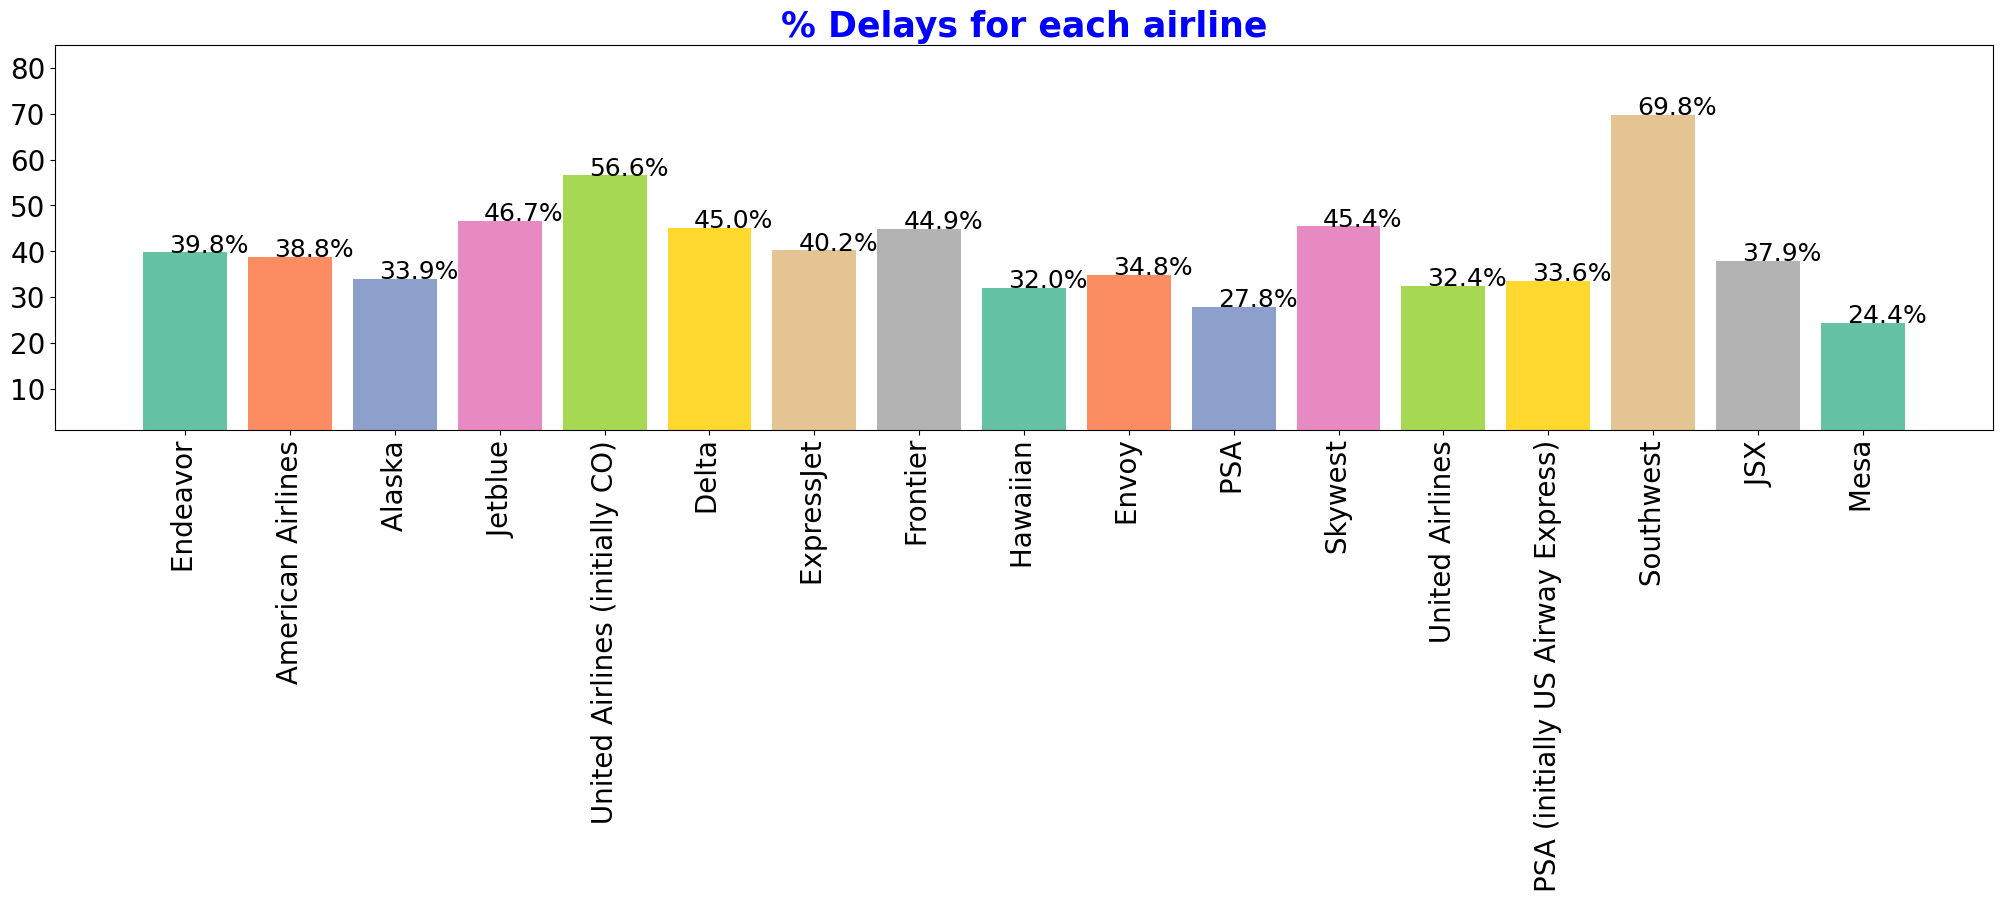

In [467]:
# Plotting a bar chart for a comparative view of delays in all the airlines vs the SouthWest Airlines.xlsx
plt.figure(figsize=(25,5))
plt.bar(plot_data.Description, height = plot_data.Delay, color = plt.get_cmap('Set2').colors, align='center')
for v, idx in zip(plot_data.Delay.values, plot_data.index):
    plt.annotate('{:.1f}%'.format(v), xy=(idx-0.15,v), size =18)
plt.ylim(1,85)
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
plt.title('% Delays for each airline', size=25, color='blue', weight='heavy')
plt.show()
              

**As we can see in the above bar chart, SouthWest airlines has the most delayed flgihts i.e. 69.8% to be exact.**

**Mesa** is the airlines with least delays.

- Number of delayed flights on different weekdays, which days of the week are the safest to travel?

In [468]:
cdt.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,data_2021_source_airport,data_2021_dest_airport,Founded
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,11725347.0,16242821.0,1931.0
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,18940287.0,20900875.0,1967.0
2,3,AA,2400,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0,23663410.0,30005266.0,1926.0
3,4,AA,2466,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0,11725347.0,30005266.0,1926.0
4,5,AS,108,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0,2184959.0,17430195.0,1932.0


In [469]:
# Lets calculate the % of delays for each airline for each weekday.

delay_each_day = cdt.groupby('DayOfWeek')['Delay'].apply(delay_percent).reset_index()
delay_each_day

,DayOfWeek,Delay
0,1,47.28
1,2,45.25
2,3,47.63
3,4,45.84
4,5,42.58
5,6,40.57
6,7,45.77


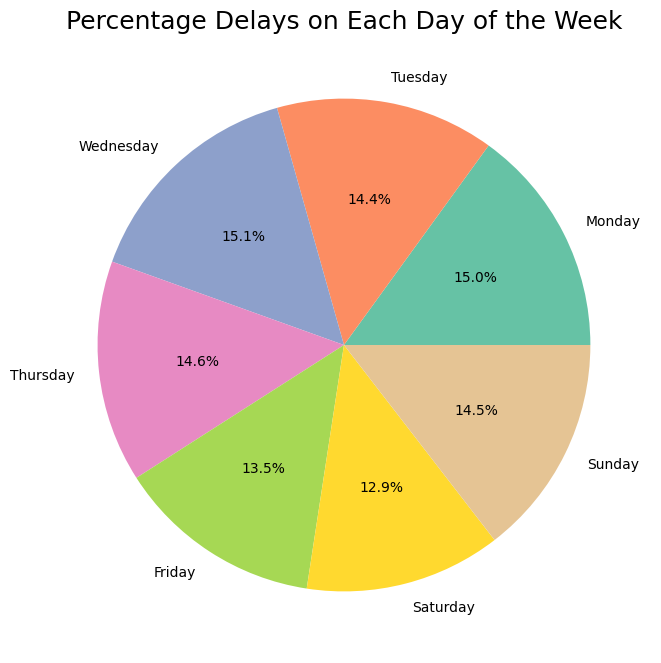

In [470]:
# Data for the pie chart
day_numbers = delay_each_day['DayOfWeek']
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
values = delay_each_day['Delay'].values

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=day_names, autopct='%.1f%%', colors=plt.get_cmap('Set2').colors)

# Adding a title
plt.title('Percentage Delays on Each Day of the Week', size=18)

# Displaying the pie chart
plt.show()

**From the pie chart above the best days to travel are: Friday and Saturday.**

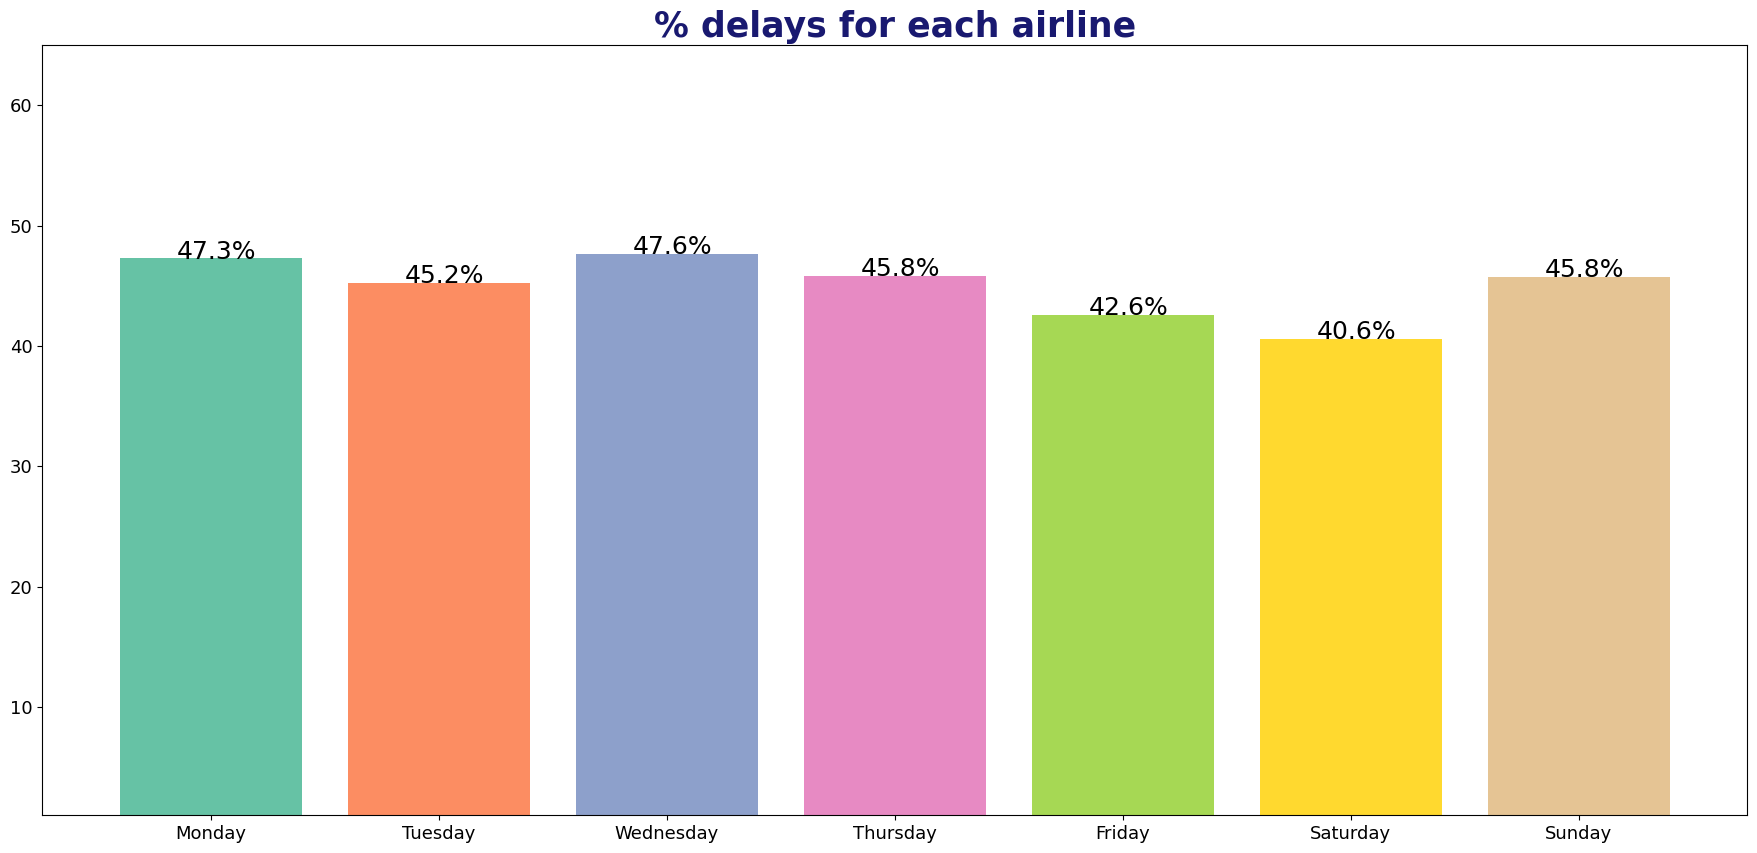

In [471]:
plt.figure(figsize = (22,10))
plt.bar(delay_each_day['DayOfWeek'], height = delay_each_day['Delay'].values, color = plt.get_cmap('Set2').colors)
for v, idx in zip(delay_each_day['Delay'].values, range(1, len(delay_each_day['DayOfWeek'])+1)):
    plt.annotate('{:.1f}%'.format(v), xy = (idx-0.15, v), size = 18)
plt.ylim(1,65)
plt.xticks(range(1, len(delay_each_day['DayOfWeek'])+1), day_names, size=13)
plt.yticks(size = 13)
plt.title('% delays for each airline', size = 25, color = 'midnightblue', weight = 'heavy')
plt.show()

**From the bar chart above, we can see that Friday and Saturday have the shortest bars for % delays, hence these two days are the safest to travel.**

- Which airlines to recommend for short, medium, and long length travel?


In [472]:
duration = cdt[['Airline', 'Length', 'Delay']].copy()
duration.head()

,Airline,Length,Delay
0,CO,205,1
1,US,222,1
2,AA,165,1
3,AA,195,1
4,AS,202,0


In [473]:
# Dataset with delay % of each airline for short, medium, and long range travel.

duration['travel_time'] = pd.cut(duration.Length, 3, labels = ['short', 'medium', 'long'])
duration_grp = duration.groupby(['Airline', 'travel_time'])['Delay'].apply(delay_percent).reset_index().pivot(index = 'Airline', columns = 'travel_time').fillna(0)['Delay']
duration_grp.columns = duration_grp.columns.astype(str)
duration_grp.reset_index()

travel_time,Airline,short,medium,long
0,9E,39.78,0.00,0.00
1,AA,37.61,43.25,60.40
2,AS,32.58,38.17,0.00
3,B6,45.70,51.05,0.00
4,CO,52.82,64.95,66.87
5,DL,43.87,50.24,48.62
6,EV,40.20,50.00,0.00
7,F9,45.04,43.56,0.00
8,HA,30.16,40.48,0.00
9,MQ,34.81,27.42,0.00


In [474]:
airline_dict.rename(columns = {'Column':'Airline'}, inplace = True)

In [475]:
airline_dict.Description = airline_dict.Description.str.strip()

In [476]:
duration_grp = pd.merge(duration_grp, airline_dict[['Airline', 'Description']], how = 'left', left_on = 'Airline', right_on = 'Airline')

In [477]:
duration_grp

,Airline,short,medium,long,Description
0,9E,39.78,0.00,0.00,Endeavor
1,AA,37.61,43.25,60.40,American Airlines
2,AS,32.58,38.17,0.00,Alaska
3,B6,45.70,51.05,0.00,Jetblue
4,CO,52.82,64.95,66.87,United Airlines (initially CO)
5,DL,43.87,50.24,48.62,Delta
6,EV,40.20,50.00,0.00,ExpressJet
7,F9,45.04,43.56,0.00,Frontier
8,HA,30.16,40.48,0.00,Hawaiian
9,MQ,34.81,27.42,0.00,Envoy


In [478]:
cdt.Airline.nunique()

17

In [479]:
duration_grp.short.min()

24.37

In [480]:
long = duration_grp[duration_grp.long == duration_grp.long.min()].Description.values.tolist()
print(len(long),'Airlines with minimum delays (0%) for long flights:\n',','.join(long))

medium= duration_grp[duration_grp.medium == duration_grp.medium.min()].Description.values.tolist()
print('\n',len(medium),'Airline with minimum delays (0%) for medium flights:\n',','.join(medium))

short = duration_grp[duration_grp.short == duration_grp.short.min()].Description.values.tolist()
print('\n', len(short),'Airline with minimum delays (24.37%) for short flights:\n',','.join(short))

13 Airlines with minimum delays (0%) for long flights:
 Endeavor,Alaska,Jetblue,ExpressJet,Frontier,Hawaiian,Envoy,PSA,Skywest,PSA (initially US Airway Express),Southwest,JSX,Mesa

 1 Airline with minimum delays (0%) for medium flights:
 Endeavor

 1 Airline with minimum delays (24.37%) for short flights:
 Mesa


**Here are the recommended airlines with minimum delays that are safest to travel for each kind of travel distance:**
- **Long flights (0% delay)**: Endeavor, Alaska, Jetblue, ExpressJet, Frontier, Hawaiian, Envoy, PSA, Skywest, PSA (initially US Airway Express), Southwest, JSX, Mesa
- **Medium flights (0% delays)**: Endeavor
- **Short flights (24.37% delays)**: Mesa

- Do you observe any pattern in the time of departure of flights of long duration?

In [482]:
# Creating three equal width bins for length of flights and adding them to the dataset.
cdt['duration'] = pd.cut(cdt.Length,3, labels = ['short', 'medium', 'long'])

In [483]:
cdt.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,data_2021_source_airport,data_2021_dest_airport,Founded,duration
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,11725347.0,16242821.0,1931.0,short
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,18940287.0,20900875.0,1967.0,medium
2,3,AA,2400,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0,23663410.0,30005266.0,1926.0,short
3,4,AA,2466,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0,11725347.0,30005266.0,1926.0,short
4,5,AS,108,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0,2184959.0,17430195.0,1932.0,short


In [484]:
cdt.isna().sum()

id                             0
Airline                        0
Flight                         0
AirportFrom                    0
AirportTo                      0
DayOfWeek                      0
Time                           0
Length                         0
Delay                          0
type_source_airport            0
elevation_ft_source_airport    0
runway_count_source_airport    0
type_dest_airport              0
elevation_ft_dest_airport      0
runway_count_dest_airport      0
data_2021_source_airport       0
data_2021_dest_airport         0
Founded                        0
duration                       0
dtype: int64

In [485]:
pd.crosstab(cdt.Time, cdt.duration)['long']

Time
10      0
15      0
20      0
21      0
25      0
       ..
1428    0
1430    0
1431    0
1435    0
1439    0
Name: long, Length: 1131, dtype: int64

In [486]:
y = pd.crosstab(cdt.Time, cdt.duration)['long'].index
x = pd.crosstab(cdt.Time, cdt.duration)['long'].values

In [487]:
filter_data = cdt.loc[cdt.duration == 'long', ['Time', 'duration']]
filter_data.head()

,Time,duration
4232,565,long
4772,595,long
5738,650,long
6104,670,long
6477,690,long


In [488]:
filter_data.Time.describe()

count     559.000000
mean      840.635063
std       221.020092
min       540.000000
25%       670.000000
50%       717.000000
75%      1045.000000
max      1310.000000
Name: Time, dtype: float64

- **Departure Time Range**: The departure times range from the minimum value of 540 minutes (after midnight) to the maximum value of 1310 minutes. This suggests that the flights in the dataset have departure times spanning throughout the day.

- **Average Departure Time**: The average departure time, represented by the mean of approximately 840.64 minutes, indicates that, on average, flights tend to depart around 8:40 AM (assuming midnight as the starting point).

- **Variability of Departure Times**: The standard deviation of approximately 221.02 minutes suggests that the departure times have a moderate amount of variability or spread around the mean. This indicates that departure times are not tightly clustered around a specific time but rather exhibit some degree of dispersion.

- **Quartiles**: The 25th percentile (first quartile) value of 670 minutes and the 75th percentile (third quartile) value of 1045 minutes indicate that 25% of the flights depart before 6:10 AM (approximately) and 75% of the flights depart before 5:45 PM (approximately). This information helps understand the distribution of departure times

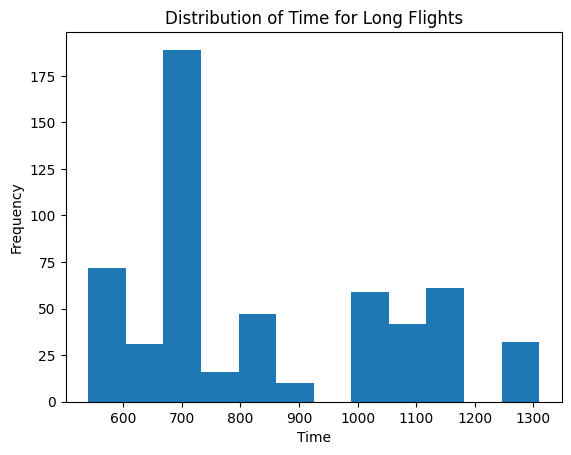

In [489]:
# Plotting a bar chart for visualizing the distribution of time for long flights.
plt.hist(filter_data.Time, bins=12)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Time for Long Flights')
plt.show()


- **Maximum** number of flights are departing at ~700 minutes, i.e. around 11:40 AM. 
- There are **two empty time zones**, ~(900-1000) and ~(1160-1240) when no long distances flights depart. 

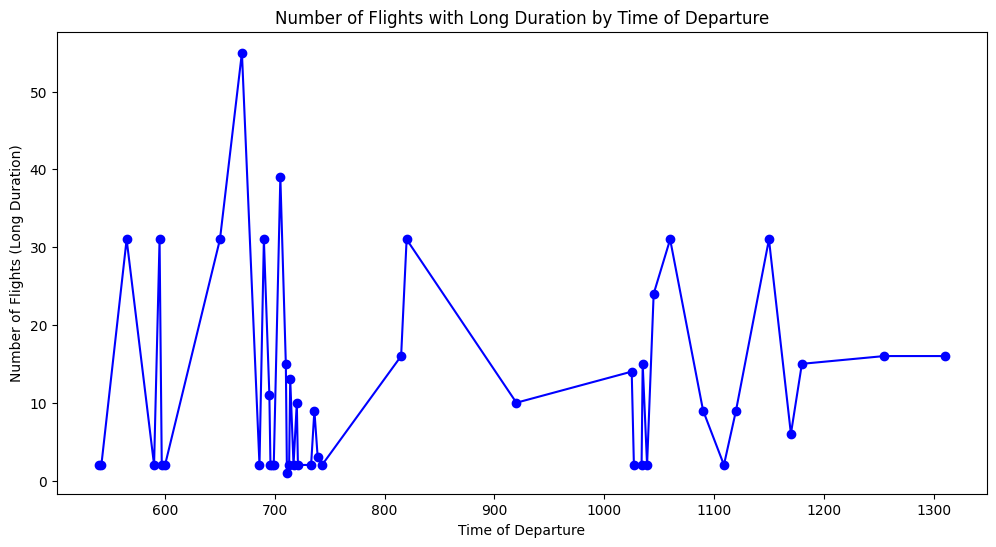

In [490]:
# Plotting a line graph to visualize the distribution of departure time of long flights. 
# Filter the data for flights with long duration
long_duration_flights = cdt[cdt['duration'] == 'long']

# Group the data by time and count the number of flights
time_counts = long_duration_flights['Time'].value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(time_counts.index, time_counts.values, marker='o', linestyle='-', color='blue')

# Set the axis labels and title
plt.xlabel('Time of Departure')
plt.ylabel('Number of Flights (Long Duration)')
plt.title('Number of Flights with Long Duration by Time of Departure')

# Show the plot
plt.show()

- Maxium number of flights depart between ~(660-710) minutes from midnight.
- The two empty zones identified above are not ture. There are some flights departing at almost every time stamp. 

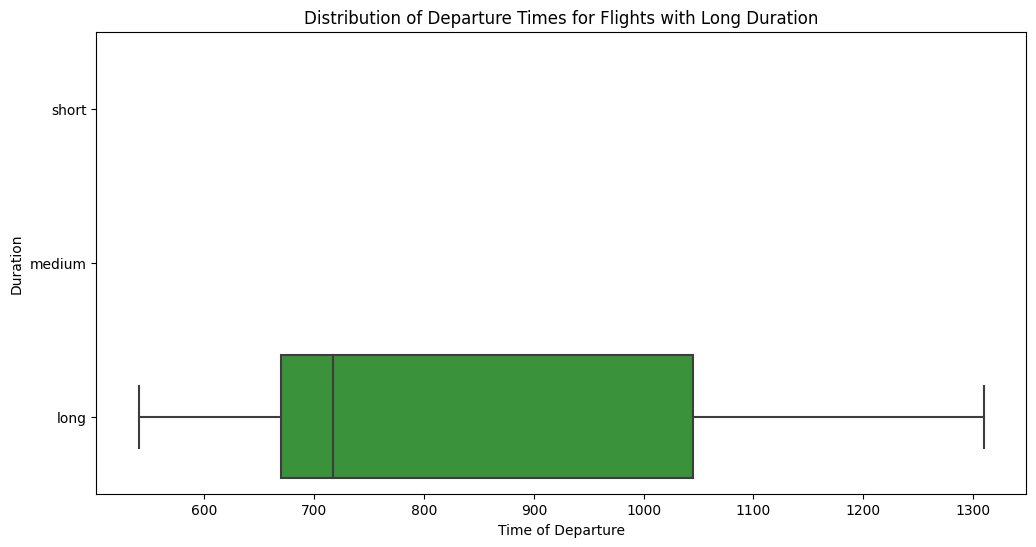

In [491]:
# Filter the data for flights with long duration
long_duration_flights = cdt[cdt['duration'] == 'long']

# Plot the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=long_duration_flights, x='Time', y='duration')

# Set the axis labels and title
plt.xlabel('Time of Departure')
plt.ylabel('Duration')
plt.title('Distribution of Departure Times for Flights with Long Duration')

# Show the plot
plt.show()

Observations till now:
- 75% of all the long duration flights depart before 6:00 PM in the evening.
- 50% of flights depart before 12:00 PM in the afternoon.
- The earliest long duration flight departs at 9:00 AM.
- The last long duration flight departs at 10:50 PM.


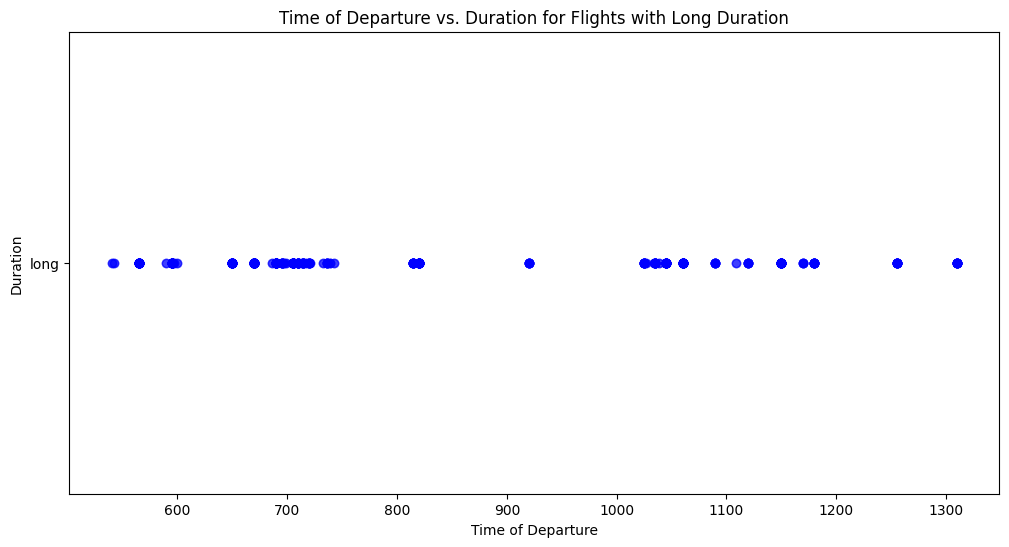

In [492]:
# Plotting a scatter plot for visualizing the distribution of departure time of long flights.
# Filter the data for flights with long duration
long_duration_flights = cdt[cdt['duration'] == 'long']

# Plot the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(long_duration_flights['Time'], long_duration_flights['duration'], color='blue', alpha=0.5)

# Set the axis labels and title
plt.xlabel('Time of Departure')
plt.ylabel('Duration')
plt.title('Time of Departure vs. Duration for Flights with Long Duration')

# Show the plot
plt.show()


The clustered scatter plot confirms the observations made above.

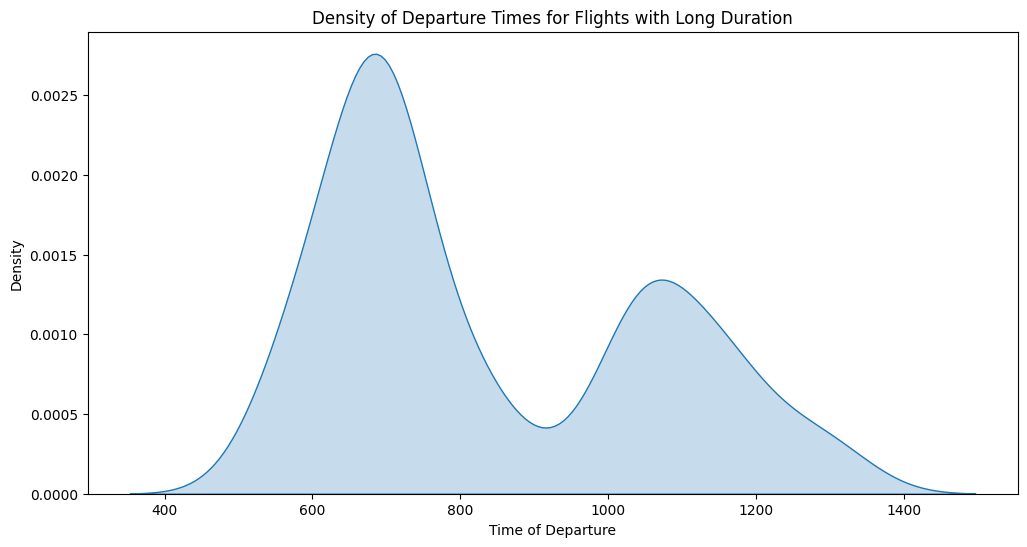

In [493]:
# Plotting a KDE plot for visualizing the distribution of departure time of long flights.
# Filter the data for flights with long duration
long_duration_flights = cdt[cdt['duration'] == 'long']

# Plot the KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=long_duration_flights, x='Time', fill=True)

# Set the axis labels and title
plt.xlabel('Time of Departure')
plt.ylabel('Density')
plt.title('Density of Departure Times for Flights with Long Duration')

# Show the plot
plt.show()


The KDE plot confirms the observatios made above.

In [494]:
from scipy.stats import ttest_ind, f_oneway
import pandas as pd

# Convert the 'Time' column to numeric data type
cdt['Time'] = pd.to_numeric(cdt['Time'], errors='coerce')

# Filter the data for flights with long duration and other durations
long_duration_flights = cdt[cdt['duration'] == 'long']
other_duration_flights = cdt[cdt['duration'] != 'long']

# Perform t-test to compare the means of departure times
t_statistic, p_value = ttest_ind(long_duration_flights['Time'], other_duration_flights['Time'], nan_policy='omit')

# Perform ANOVA to compare the means of departure times across different durations
f_statistic, p_value_anova = f_oneway(cdt['Time'], pd.Categorical(cdt['duration']).codes)

print("T-test: T-statistic =", t_statistic, "p-value =", p_value)
print("ANOVA: F-statistic =", f_statistic, "p-value =", p_value_anova)


T-test: T-statistic = 3.335989828914716 p-value = 0.0008500226450162412
ANOVA: F-statistic = 4299971.900179982 p-value = 0.0


- **T-test Result**: The t-statistic of 3.336 indicates a significant difference in the means of departure times between long-duration flights and other-duration flights. This suggests that there is a distinct pattern or variation in the departure times of long-duration flights compared to other-duration flights.

- **ANOVA Result**: The ANOVA test indicates a significant difference in departure times across different flight durations, including long-duration flights. This suggests that the departure times of long-duration flights are not only different from other-duration flights but also show variation within the group of long-duration flights themselves. This further supports the existence of patterns or systematic differences in the departure times of long-duration flights.

- How large hubs compare to medium hubs in terms of count of delayed flights? Use appropriate visualization to represent your findings.

In [495]:
cdt.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,data_2021_source_airport,data_2021_dest_airport,Founded,duration
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,11725347.0,16242821.0,1931.0,short
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,18940287.0,20900875.0,1967.0,medium
2,3,AA,2400,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0,23663410.0,30005266.0,1926.0,short
3,4,AA,2466,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0,11725347.0,30005266.0,1926.0,short
4,5,AS,108,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0,2184959.0,17430195.0,1932.0,short


<Axes: xlabel='type_source_airport'>

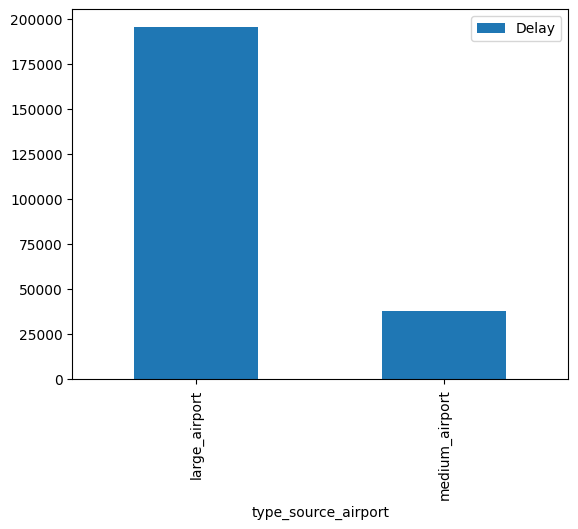

In [496]:
cdt.groupby('type_source_airport')[['Delay']].agg('sum').plot.bar()

Large airports have **higher count of delayed flights**. But this could be due to the fact that **they serve a larger number of people with more number of flights and routes**.

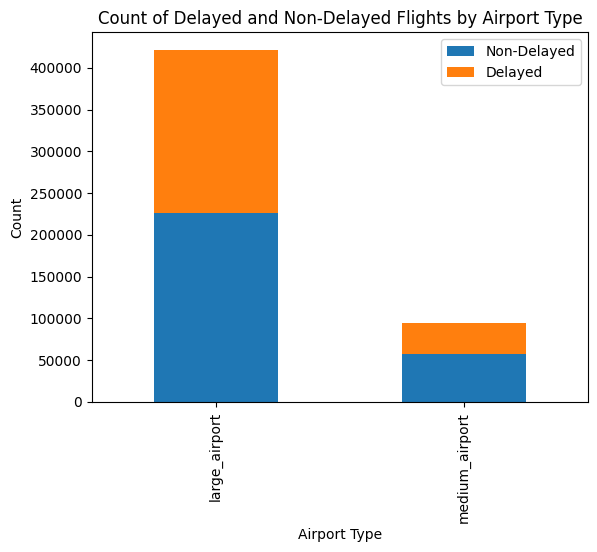

In [497]:
# Creating a stacked bar plot to visualize the balance between delayed and non-delayed flights. 
delay_counts = cdt.groupby('type_source_airport')['Delay'].value_counts().unstack()
delay_counts.plot(kind='bar', stacked=True)
plt.xlabel('Airport Type')
plt.ylabel('Count')
plt.title('Count of Delayed and Non-Delayed Flights by Airport Type')
plt.legend(['Non-Delayed', 'Delayed'])
plt.show()


- The plot shows us that there is a significant difference between the number of flights large and medium airports handle. 
**Medium airports have a higher ratio of non-delayed flights**. This could mean that given the traffic each type of hub handles, medium airports are better at ensuring timely take-offs.

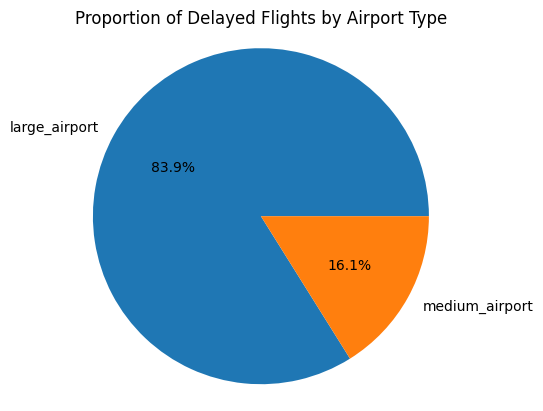

In [498]:
delay_counts = cdt[cdt['Delay'] == 1].groupby('type_source_airport').size()
delay_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of Delayed Flights by Airport Type')
plt.show()


In [499]:
# Calculate the proportion of delayed flights for each airport type
delay_proportion = cdt.groupby('type_source_airport')['Delay'].mean()*100



In [500]:
delay_proportion

type_source_airport
large_airport     46.408639
medium_airport    39.601642
Name: Delay, dtype: float64

Large airports have a 46% delay where as medium airports have 39% delay. Therefore, we can conclude that **large_airports have a higher chance of a delayed flights than medium_airports**. 

- For large hubs, forecast the number of passengers for 2022 using simple moving average method. 

In [501]:
# Lets develop a series of traffic data for large airports. 

cols = ['iata_code']+ final_hub_data.columns[final_hub_data.columns.str.startswith('data_')].tolist()

In [502]:
final_hub_data.head()

,rank,hub_type,airports,iata_code,ciity_served,state,data_2021,data_2020,data_2019,data_2018,data_2017,data_2016,data_2015,data_2014,data_2013,data_2012,city_served
0,1,large,Hartsfield–Jackson Atlanta International Airport,ATL,Atlanta,GA,36676010,20559866,53505795,51865797,50251964,50501858,49340732,46604273,45308407,45798928,NaN
1,2,large,Dallas/Fort Worth International Airport,DFW,Dallas & Fort Worth,TX,30005266,18593421,35778573,32821799,31816933,31283579,31589839,30804567,29038128,28022904,NaN
2,3,large,Denver International Airport,DEN,Denver,CO,28645527,16243216,33592945,31362941,29809097,28267394,26280043,26000591,25496885,25799841,NaN
3,4,large,O'Hare International Airport,ORD,Chicago,IL,26350976,14606034,40871223,39873927,38593028,37589899,36305668,33843426,32317835,32171795,NaN
4,5,large,Los Angeles International Airport,LAX,Los Angeles,CA,23663410,14055777,42939104,42624050,41232432,39636042,36351272,34314197,32425892,31326268,NaN


In [503]:
time_series = final_hub_data.loc[final_hub_data.hub_type == 'large', cols].set_index('iata_code').T

In [504]:
time_series['ATL']

data_2021    36676010
data_2020    20559866
data_2019    53505795
data_2018    51865797
data_2017    50251964
data_2016    50501858
data_2015    49340732
data_2014    46604273
data_2013    45308407
data_2012    45798928
Name: ATL, dtype: int64

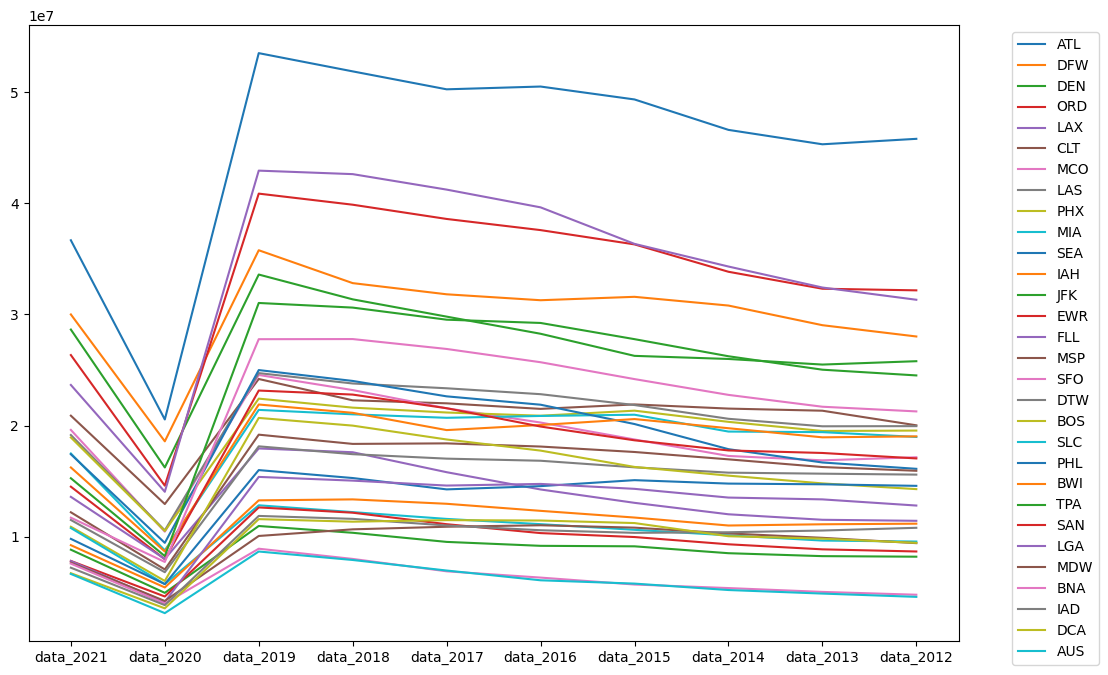

In [505]:
# Plotting the time series for each airport.
plt.figure(figsize=(12, 8))
for ser in time_series.columns:
    plt.plot(time_series[ser], label=ser)

# Set the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show(block=True)


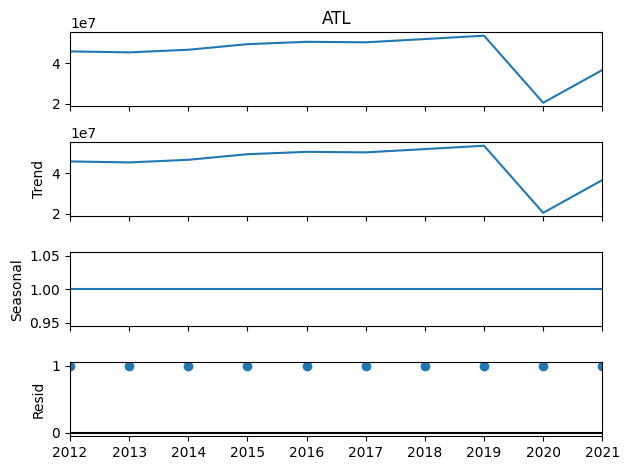

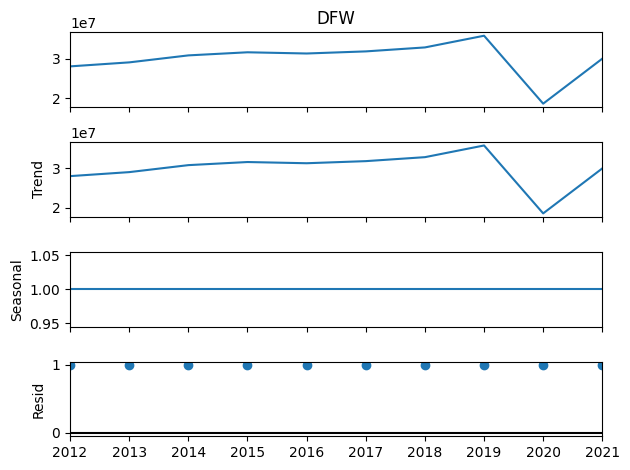

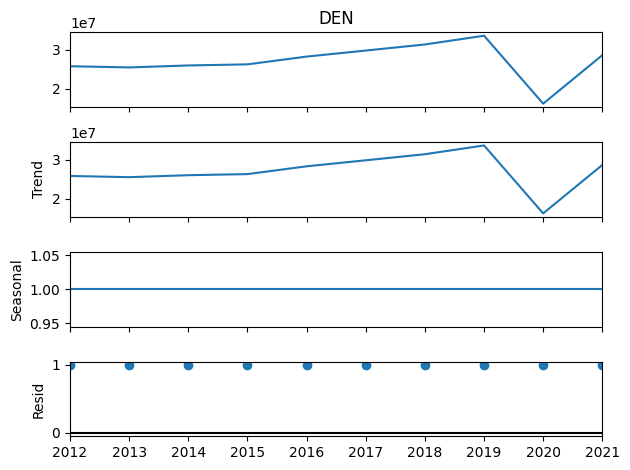

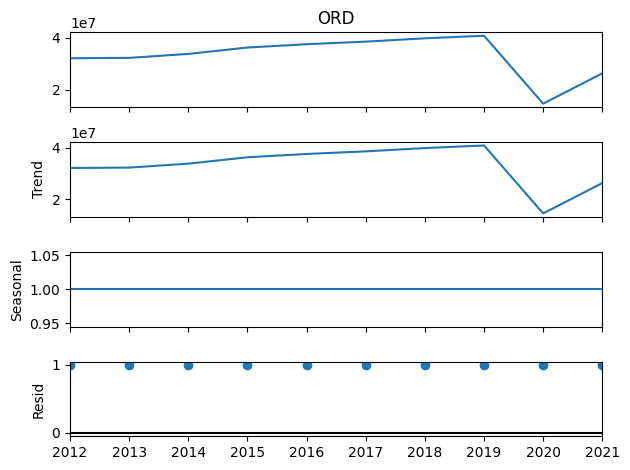

In [506]:
# Performing seasonal decomposition on first 4 airports.
for ser in time_series.columns[:4]:
    series = time_series[ser].copy()
    series.index = pd.to_datetime(series.index.str.replace('data_',''))
    series.sort_index(inplace = True)
    decomposition = sm.tsa.seasonal_decompose(series, model='multiplicative') 
    decomposition.plot()
plt.show()

Observations:
- The **trend** for all four airports is that the traffic is on an uptrend after a major drop in 2019 due to COVID. 
- The seasonality shows that there are no recurring patterns in the traffic data. 
- The residual shows that there are no abnormnal patterns in the traffic data.

In [507]:
error = {}
forecast_2022 = {}
f = {}
wind_min = {}
win_min_mape = {}
for ser in time_series.columns:
    series = time_series[ser].copy()
    series.index = pd.to_datetime(series.index.str.replace('data_',''))
    series.sort_index(inplace = True)
    test = series[-1:]
    train = series[:-1]
    err_temp = {}
    fore_2022 = {}
    for window in range(2,10):
        forecast = series.rolling(window).mean()
        # accuracy 
        mape = round(mean_absolute_percentage_error(test, forecast[-1:]),4)
        err_temp.update({window : mape})
        # forecast for 2022
        fore_2022.update({window : series[-window:].mean()})
    err_ser = pd.Series(err_temp)
    min_wind = err_ser[(err_ser == err_ser.min())].index.values[0]
    forecast_2022.update({ser : round(series[-min_wind:].mean(),2)})
    wind_min.update({ser : min_wind})
    win_min_mape.update({ser :err_temp[min_wind] })
    f.update({ser :pd.Series(fore_2022).round(2) })
    error.update({ser : err_ser})
    
    # forecast for 2022


In [508]:
win_min_mape

{'ATL': 0.0065,
 'DFW': 0.0015,
 'DEN': 0.023,
 'ORD': 0.0351,
 'LAX': 0.1362,
 'CLT': 0.0006,
 'MCO': 0.0077,
 'LAS': 0.0212,
 'PHX': 0.0001,
 'MIA': 0.0182,
 'SEA': 0.0076,
 'IAH': 0.0389,
 'JFK': 0.1912,
 'EWR': 0.0486,
 'FLL': 0.0122,
 'MSP': 0.0502,
 'SFO': 0.1697,
 'DTW': 0.0559,
 'BOS': 0.1502,
 'SLC': 0.0062,
 'PHL': 0.0719,
 'BWI': 0.0082,
 'TPA': 0.0029,
 'SAN': 0.0686,
 'LGA': 0.1655,
 'MDW': 0.0453,
 'BNA': 0.0598,
 'IAD': 0.0595,
 'DCA': 0.0844,
 'AUS': 0.0017}

In [509]:
sma_forecast = pd.DataFrame(f)
sma_error = pd.DataFrame(error)

In [510]:
sma_prediction = pd.DataFrame(forecast_2022.values(), index = forecast_2022.keys(), columns = ['forecast_2022'] )
sma_prediction['window_used'] = wind_min.values()
sma_prediction['mape_at_window'] = win_min_mape.values()

In [511]:
sma_prediction.sort_values('forecast_2022', ascending=False)

,forecast_2022,window_used,mape_at_window
ATL,36913890.33,3,0.0065
DFW,30049928.50,6,0.0015
DEN,27986853.33,6,0.0230
ORD,27276077.67,3,0.0351
LAX,26886097.00,3,0.1362
CLT,20913675.38,8,0.0006
LAS,19566943.50,4,0.0212
MCO,19467356.50,8,0.0077
PHX,18942662.60,5,0.0001
JFK,18193272.00,3,0.1912


**As we saw in the line chart earlier, the airports: ATL, DFW, DEN,and ORD will witness the maximum traffic in 2022.** 

5. Use hypothesis testing strategies to discover:
- If the airport's altitude has anything to do with flight delays for incoming and
departing flights
- If the number of runways at an airport affects flight delays
- If the duration of a flight (length) affects flight delays
Hint: Test this from the perspective of both the source and destination airports

_______

- If the airport's altitude has anything to do with flight delays for incoming and departing flights

##### For outgoing flights.

In [512]:
# 2 sample t test for outgoing flights with the following hypothesis.
# H0 : avg elevation for Delayed flights - avg elevation for not Delayed flights = 0
# Ha : avg elevation for Delayed flights - avg elevation for not Delayed flights != 0

In [513]:
sample1 = cdt[cdt.Delay == 1].elevation_ft_source_airport
sample2 = cdt[cdt.Delay == 0].elevation_ft_source_airport

In [514]:
t, p = stats.ttest_ind(sample1, sample2)

In [515]:
if p < 0.05:
    result = 'reject null'
else :
    result = 'fail to reject null'

print(result)

reject null


There is a statistically significant difference in the average elevation between delayed and not delayed flights. This suggests that the **elevation of the source airport may play a role in flight delays**.

##### For incoming flights.

In [516]:
# 2 sample t test for incoming flights with the following hypothesis.
# H0 : avg elevation for Delayed flights - avg elevation for not Delayed flights = 0
# Ha : avg elevation for Delayed flights - avg elevation for not Delayed flights != 0

In [517]:
sample1 = cdt[cdt.Delay == 1].elevation_ft_dest_airport
sample2 = cdt[cdt.Delay == 0].elevation_ft_dest_airport

In [518]:
t, p = stats.ttest_ind(sample1, sample2)

In [519]:
if p < 0.05:
    result = 'reject null'
else :
    result = 'fail to reject null'

print(result)

reject null


There is a statistically significant difference in the average elevation between delayed and not delayed flights. This suggests that the **elevation of the destination airport may play a role in flight delays**.

- If the number of runways at an airport affects flight delays

In [520]:
# t test :
# H0 : avg runway count for delayed filghts - avg runway count for non delayed flights => 0 
# Ha : avg runway count for delayed filghts - avg runway count for non delayed flights < 0 

In [521]:
cdt.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,data_2021_source_airport,data_2021_dest_airport,Founded,duration
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,11725347.0,16242821.0,1931.0,short
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,18940287.0,20900875.0,1967.0,medium
2,3,AA,2400,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0,23663410.0,30005266.0,1926.0,short
3,4,AA,2466,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0,11725347.0,30005266.0,1926.0,short
4,5,AS,108,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0,2184959.0,17430195.0,1932.0,short


In [522]:
s1 = cdt[cdt.Delay == 1].runway_count_source_airport
s2 = cdt[cdt.Delay == 0].runway_count_source_airport

In [523]:
t, p = stats.ttest_ind(s1, s2)
if p < 0.05:
    result = 'reject null'
else :
    result = 'fail to reject null'
print(result)

reject null


In [524]:
s1 = cdt[cdt.Delay == 1].runway_count_dest_airport
s2 = cdt[cdt.Delay == 0].runway_count_dest_airport

In [525]:
t, p = stats.ttest_ind(s1, s2)
if p < 0.05:
    result = 'reject null'
else :
    result = 'fail to reject null'
print(result)

reject null


The resulting output "reject null" for both tests suggests that there is evidence to support the alternative hypothesis, indicating that **the average runway count for delayed flights is significantly lower than the average runway count for non-delayed flights in both the source and destination airports**.

- If the duration of a flight (length) affects flight delays
Hint: Test this from the perspective of both the source and destination airports

In [526]:
# t test :
# H0 : avg duration for delayed filghts - avg duration for non delayed flights = 0 
# Ha : avg duration for delayed filghts - avg duration for non delayed flights != 0 

In [527]:
s1 = cdt[cdt.Delay == 1].Length
s2 = cdt[cdt.Delay == 0].Length

In [528]:
t, p = stats.ttest_ind(s1, s2)

In [529]:
if p < 0.05:
    result = 'reject null'
else :
    result = 'fail to reject null'
print(result)

reject null


The result is 'reject null', indicating that there is a **significant difference in the average duration between delayed and non-delayed flights**.

In [530]:
cs = pd.crosstab(cdt.duration, cdt.Delay)
cs

Delay,0,1
duration,,
short,253865,203612
medium,28983,29198
long,252,307


In [531]:
chi, p, df, ex = stats.chi2_contingency(cs)
if p < 0.05:
    result = 'reject null'
else :
    result = 'fail to reject null'
print(result)

reject null


The result of the chi-square test was "reject null," it means that there is evidence to suggest a **significant relationship between the duration of flights and flight delays**.

In [532]:
# t test :
# H0 : avg duration for delayed filghts - avg duration for non delayed flights <= 0 
# Ha : avg duration for delayed filghts - avg duration for non delayed flights > 0 

In [533]:
t, p = stats.ttest_ind(s1, s2)
if p < 0.05:
    result = 'reject null'
else :
    result = 'fail to reject null'
print(result)

reject null


The result of the t-test was "reject null," it means that there is evidence to suggest a significant difference in the average duration between delayed flights and non-delayed flights. Specifically, **the average duration of delayed flights is significantly greater than the average duration of non-delayed flights.**

- Find the correlation matrix between the flight delay predictors, create a heatmap to visualize this, and share your findings

In [534]:
cdt.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay', 'type_source_airport',
       'elevation_ft_source_airport', 'runway_count_source_airport',
       'type_dest_airport', 'elevation_ft_dest_airport',
       'runway_count_dest_airport', 'data_2021_source_airport',
       'data_2021_dest_airport', 'Founded', 'duration'],
      dtype='object')

In [535]:
numeric_columns = cdt.select_dtypes(include=['float64', 'int64']).columns
correlation_with_delay = cdt[numeric_columns].corr()['Delay']

correlation_with_delay


id                             0.140434
Flight                        -0.057371
DayOfWeek                     -0.025832
Time                           0.149801
Length                         0.040162
Delay                          1.000000
elevation_ft_source_airport    0.012551
runway_count_source_airport    0.029099
elevation_ft_dest_airport      0.013180
runway_count_dest_airport     -0.061431
data_2021_source_airport       0.020315
data_2021_dest_airport        -0.051622
Founded                       -0.003102
Name: Delay, dtype: float64

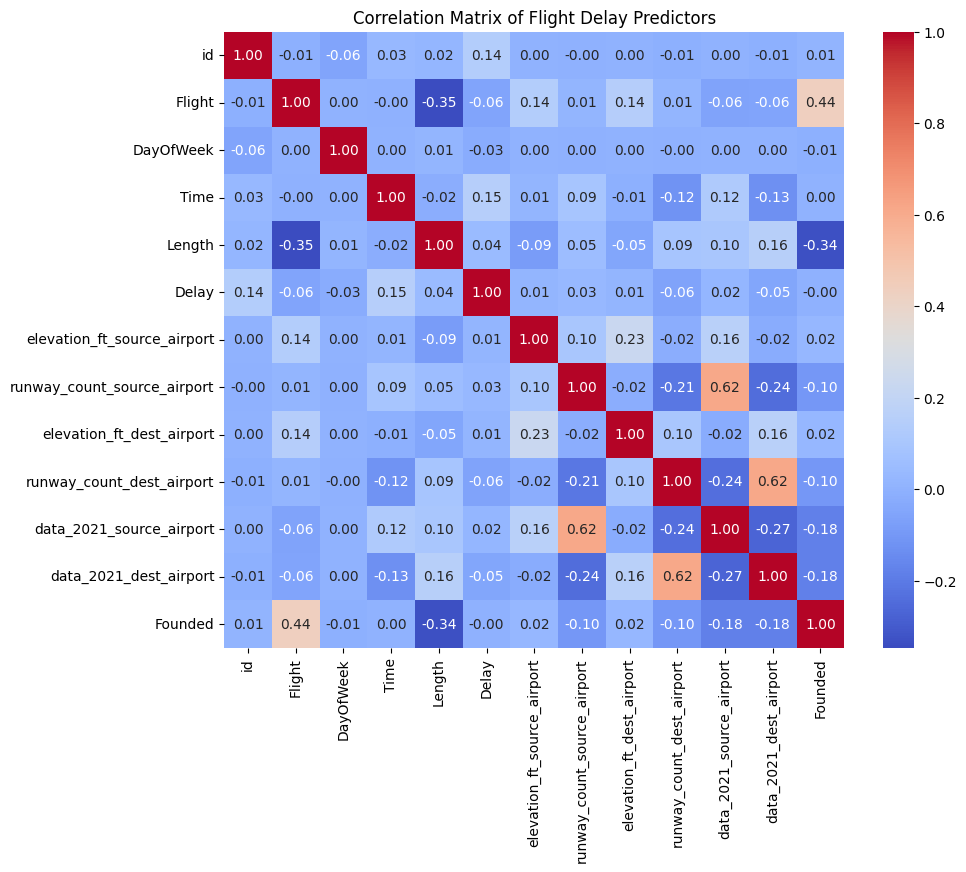

In [536]:
# Calculate the correlation matrix
correlation_matrix = cdt[numeric_columns].corr()

# Create heatmap with correlation values
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix of Flight Delay Predictors')
plt.show()


Observations:
- The **'Time'** variable has the highest positive correlation with 'Delay' (0.149801), indicating that flights scheduled for later times may have a higher likelihood of being delayed.
- The **'Length'** variable has a slightly positive correlation with 'Delay' (0.040162), suggesting that longer flights may be associated with a slightly higher chance of delays.
- The **'Flight'** variable shows a weak negative correlation with 'Delay' (-0.057371), implying that certain flight numbers may be associated with a lower likelihood of delays.
- The **'runway_count_dest_airport'** variable has a moderate negative correlation with 'Delay' (-0.061431), indicating that airports with a higher number of runways at the destination may be associated with a lower probability of delays.
- Other variables such as 'DayOfWeek', 'elevation_ft_source_airport', 'elevation_ft_dest_airport', 'data_2021_source_airport', 'data_2021_dest_airport', and 'Founded' show weak correlations with 'Delay'.

Exporting the final dataset to csv for future use. 

In [537]:
cdt.to_csv('usairlinesfinaldata.csv', index = False)

#### Machine Learning

- Use OneHotEncoder and OrdinalEncoder to deal with categorical variables

In [540]:
cdt.isna().sum()

id                             0
Airline                        0
Flight                         0
AirportFrom                    0
AirportTo                      0
DayOfWeek                      0
Time                           0
Length                         0
Delay                          0
type_source_airport            0
elevation_ft_source_airport    0
runway_count_source_airport    0
type_dest_airport              0
elevation_ft_dest_airport      0
runway_count_dest_airport      0
data_2021_source_airport       0
data_2021_dest_airport         0
Founded                        0
duration                       0
dtype: int64

In [541]:
cdt.drop(columns = ['id', 'Flight','duration'], inplace = True)

In [542]:
cdt.head()

,Airline,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,data_2021_source_airport,data_2021_dest_airport,Founded
0,CO,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,11725347.0,16242821.0,1931.0
1,US,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,18940287.0,20900875.0,1967.0
2,AA,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0,23663410.0,30005266.0,1926.0
3,AA,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0,11725347.0,30005266.0,1926.0
4,AS,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0,2184959.0,17430195.0,1932.0


In [543]:
cdt.type_dest_airport.unique()

array(['large_airport', 'medium_airport'], dtype=object)

In [544]:
ordinal = OrdinalEncoder(categories=[['medium_airport', 'large_airport'],['medium_airport', 'large_airport']])
ordinal.fit(cdt[['type_source_airport', 'type_dest_airport']])

OrdinalEncoder(categories=[['medium_airport', 'large_airport'],
                           ['medium_airport', 'large_airport']])

In [545]:
cdt[['type_source_airport', 'type_dest_airport']] = ordinal.transform(cdt[['type_source_airport', 'type_dest_airport']])

In [546]:
model_data = cdt.drop(columns = ['Airline', 'AirportFrom', 'AirportTo'])

In [547]:
model_data.shape

(516217, 13)

In [548]:
dummy = pd.get_dummies(model_data)
dummy.shape

(516217, 13)

In [551]:
dummy.Founded = 2023 - dummy.Founded
dummy.head()

,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,data_2021_source_airport,data_2021_dest_airport,Founded
0,3,15,205,1,1.0,13.0,4.0,1.0,97.0,5.0,11725347.0,16242821.0,92.0
1,3,15,222,1,1.0,1135.0,3.0,1.0,748.0,4.0,18940287.0,20900875.0,56.0
2,3,20,165,1,1.0,125.0,4.0,1.0,607.0,7.0,23663410.0,30005266.0,97.0
3,3,20,195,1,1.0,13.0,4.0,1.0,607.0,7.0,11725347.0,30005266.0,97.0
4,3,30,202,0,1.0,152.0,3.0,1.0,433.0,4.0,2184959.0,17430195.0,91.0


Perform the following model building steps:
- Apply logistic regression (use stochastic gradient descent optimizer) and decision tree models
- Use the stratified five fold method to build and validate the models
**Note:** Make sure you use standardization effectively, ensuring no data leakage and leverage pipelines to have a cleaner code
- Use RandomizedSearchCV for hyperparameter tuning, and use k fold for cross validation
- Keep a few data points (10%) for prediction purposes to evaluate how you would make the final prediction, and do not use t his data for testing or validation
**Note:** The final prediction will be based on the voting (majority class by 5 models created using the stratified 5 fold method)
- Compare the results of logistic regression and decision tree classifier

In [552]:
model_data.reset_index(drop = True, inplace = True)

In [554]:
# Generating a randon set of indices. 

np.random.seed(12)
deploy_idx = np.random.choice(model_data.index, replace = False, size = 5000)

In [555]:
deploy = model_data.loc[deploy_idx]

In [556]:
X_deploy = deploy.drop(columns = 'Delay')

In [557]:
model_dev = model_data.loc[~model_data.index.isin(deploy.index)]

In [558]:
deploy.reset_index(drop = True, inplace = True)
model_dev.reset_index(drop = True, inplace = True)

In [559]:
X = model_dev.drop(columns = 'Delay')
y = model_dev.Delay

In [560]:
folds = StratifiedKFold(n_splits=5, shuffle = True, random_state=12)
accuracy_train = {}
accuracy_test = {}
final_predictions_sgd = {}
i = 1
for train_index, test_index in folds.split(X,y):
    print('iter ', i)
    train, test = model_dev.loc[train_index,], model_dev.loc[test_index,]
    sc = StandardScaler()
    sgd = SGDClassifier()
    
    # define search space
    
    space = dict()
    space['sgd__penalty'] = ['l1', 'l2', 'elasticnet']
    space['sgd__l1_ratio'] = [0,.1,.2,.8,1]
    space['sgd__alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000,10000] 
    space['sgd__learning_rate'] = ['constant', 'adaptive'] 
    space['sgd__eta0']=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1 , 2e-1, 3e-1, 5e-1, 8e-1, 4e-1, 8e-1, 1, 10, 100] 
    
    pipe = Pipeline([('sc',sc), ('sgd', sgd)])
    
    # define search
    search = RandomizedSearchCV( pipe, space, scoring='accuracy', 
                                cv=5, refit=True, return_train_score = True,
                                random_state = 12, n_jobs = -1, n_iter = 2
                           )
    
    # execute search
    X_train = train.drop(columns = 'Delay')
    y_train = train.Delay
    
    result = search.fit(X_train, y_train)

    train_pred = result.predict(X_train)
    
    X_test = test.drop(columns = 'Delay')
    y_test = test.Delay
    test_pred = result.predict(X_test)
    final_predictions_sgd.update({'Fold{}'.format(i):result.predict(X_deploy)})
    
    # get rmse for each fold for train data 
    accuracy_train.update({'Fold{}'.format(i): round(accuracy_score(y_true = y_train, y_pred = train_pred)*100,3)})
    accuracy_test.update({'Fold{}'.format(i): round(accuracy_score(y_true = y_test, y_pred = test_pred) * 100,3)})
    i += 1

iter  1
iter  2
iter  3
iter  4
iter  5


In [561]:
folds = StratifiedKFold(n_splits=5, shuffle = True, random_state=12)
dt_accuracy_train = {}
dt_accuracy_test = {}
final_predictions_dt = {}
i = 1
for train_index, test_index in folds.split(X,y):
    print('iter ', i)
    
    train, test = model_dev.loc[train_index,], model_dev.loc[test_index,]
    
    sc = StandardScaler()
    dt = DecisionTreeClassifier()
    
    
    # define search space
    space = dict()
    space['dt__min_samples_split'] = [25000, 30000, 35000, 40000, 45000, 50000, 60000 ]
    space['dt__min_samples_leaf'] = [10000, 15000, 20000]
    
    pipe = Pipeline([('sc',sc), ('dt', dt)])
    
    # define search
    search = RandomizedSearchCV( pipe, space, scoring='accuracy', 
                                cv=5, refit=True, return_train_score = True,
                                random_state = 12, n_jobs = -1, n_iter = 2
                           )
    
    # execute search
    X_train = train.drop(columns = 'Delay')
    y_train = train.Delay
    
    result = search.fit(X_train, y_train)

    train_pred = result.predict(X_train)
    
    X_test = test.drop(columns = 'Delay')
    y_test = test.Delay
    test_pred = result.predict(X_test)
    final_predictions_dt.update({'Fold{}'.format(i):result.predict(X_deploy)})
    
    # get rmse for each fold for train data 
    dt_accuracy_train.update({'Fold{}'.format(i): round(accuracy_score(y_true = y_train, y_pred = train_pred)*100,3)})
    dt_accuracy_test.update({'Fold{}'.format(i): round(accuracy_score(y_true = y_test, y_pred = test_pred) * 100,3)})
    i += 1

iter  1
iter  2
iter  3
iter  4
iter  5


In [562]:
# compare results : 
train_results = pd.DataFrame ({'sgd' : accuracy_train.values(), 'dt': dt_accuracy_train.values() },
                             index = ['Fold {}'.format(i) for i in range(1,6)])
train_results

,sgd,dt
Fold 1,57.163,61.643
Fold 2,57.168,61.669
Fold 3,57.154,61.649
Fold 4,57.228,61.487
Fold 5,57.105,61.597


In [563]:
test_results = pd.DataFrame ({'sgd' : accuracy_test.values(), 'dt': dt_accuracy_test.values() },
                             index = ['Fold {}'.format(i) for i in range(1,6)])
test_results

,sgd,dt
Fold 1,57.173,61.431
Fold 2,57.182,61.304
Fold 3,57.221,61.928
Fold 4,56.891,61.421
Fold 5,57.313,61.456


In [564]:
final_predictions_dt

{'Fold1': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'Fold2': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'Fold3': array([0, 1, 0, ..., 0, 1, 0], dtype=int64),
 'Fold4': array([0, 1, 1, ..., 0, 1, 0], dtype=int64),
 'Fold5': array([0, 1, 0, ..., 0, 1, 0], dtype=int64)}

In [565]:
final_predictions_sgd


{'Fold1': array([0, 1, 0, ..., 1, 1, 0], dtype=int64),
 'Fold2': array([0, 1, 0, ..., 1, 1, 0], dtype=int64),
 'Fold3': array([0, 1, 0, ..., 1, 1, 0], dtype=int64),
 'Fold4': array([0, 1, 0, ..., 1, 1, 0], dtype=int64),
 'Fold5': array([0, 1, 0, ..., 1, 1, 0], dtype=int64)}

In [566]:
folds = StratifiedKFold(n_splits=5, shuffle = True, random_state=12)
xgb_accuracy_train = {}
xgb_accuracy_test = {}
final_predictions_xgb = []

i = 1
for train_index, test_index in folds.split(X,y):
    print('iter ', i)
    train, test = model_dev.loc[train_index,], model_dev.loc[test_index,]
    sc = StandardScaler()
    xgb_r = XGBClassifier(random_state = 12, use_label_encoder = False)

    # define search space
    space = dict()
    space['xgb_r__n_estimators'] = [40,50,60]
    space['xgb_r__max_depth'] = [3,4,5]
    space['xgb_r__colsample_bytree']:[0.4,.5,.6]
    space['xgb_r__lambda'] = [.0001,.002,.0004,.0003]
    space['xgb_r__alpha'] = [.01,.02,.1,.4]
    
    pipe = Pipeline([('sc',sc), ('xgb_r', xgb_r)])
    
    # define search
    search = RandomizedSearchCV( pipe, space, scoring='neg_root_mean_squared_error', 
                                cv=5, refit=True, return_train_score = True,
                                random_state = 12, n_jobs = -1, n_iter = 2
                           )
    
    # execute search
    X_train = train.drop(columns = 'Delay')
    y_train = train.Delay
    
    result = search.fit(X_train, y_train)

    train_pred = result.predict(X_train)
    
    X_test = test.drop(columns = 'Delay')
    y_test = test.Delay
    test_pred = result.predict(X_test)
    
    final_predictions_xgb.append(result.predict(X_deploy))  
    
    # get rmse for each fold for train data 
    xgb_accuracy_train.update({'Fold{}'.format(i): round(accuracy_score(y_true = y_train, y_pred = train_pred),3)})
    xgb_accuracy_test.update({'Fold{}'.format(i): round(accuracy_score(y_true = y_test, y_pred = test_pred),3)})
    i += 1

iter  1


c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


iter  2


c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


iter  3


c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


iter  4


c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


iter  5


c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [567]:
xgb_accuracy_train

{'Fold1': 0.647,
 'Fold2': 0.646,
 'Fold3': 0.645,
 'Fold4': 0.646,
 'Fold5': 0.645}

In [568]:
xgb_accuracy_train.values()

dict_values([0.647, 0.646, 0.645, 0.646, 0.645])

In [569]:
train_results['xgb'] = xgb_accuracy_train.values()
test_results['xgb'] = xgb_accuracy_test.values()

In [570]:
train_results

,sgd,dt,xgb
Fold 1,57.163,61.643,0.647
Fold 2,57.168,61.669,0.646
Fold 3,57.154,61.649,0.645
Fold 4,57.228,61.487,0.646
Fold 5,57.105,61.597,0.645


In [571]:
test_results

,sgd,dt,xgb
Fold 1,57.173,61.431,0.643
Fold 2,57.182,61.304,0.643
Fold 3,57.221,61.928,0.646
Fold 4,56.891,61.421,0.642
Fold 5,57.313,61.456,0.645


**The logistic regression and decision tree models perform similarly and achieve higher accuracy compared to the XGBoost model.**